# Generate Exercise One data

In [5]:
variables = {
  "provincia": [
    "Buenos Aires",
    "CABA",
    "Catamarca",
    "Chaco",
    "Chubut",
    "Córdoba",
    "Corrientes",
    "Entre Ríos",
    "Formosa",
    "Jujuy",
    "La Pampa",
    "La Rioja",
    "Mendoza",
    "Misiones",
    "Neuquén",
    "Río Negro",
    "Salta",
    "San Juan",
    "San Luis",
    "Santa Cruz",
    "Santa Fe",
    "Santiago del Estero",
    "Tierra del Fuego",
    "Tucumán"
  ],
  "centro_de_salud_cercano":["True", "False"],
  "estadio_al_momento_de_diagnostica":["I", "II", "III", "IV"],
  "consulta_en_el_ano_previo_al_diagnostico":["True", "False"],
  "cobertura_de_salud": ["Publico", "Proveedor A", "Proveedor B", "Proveedor C"],
  "edad": ["menos_de_40", "entre_40_y_50", "entre_50_y_60", "mas_de_60"],
  "comorbilidad_cardiaca":["True", "False"],
  "comorbilidad_sistema_digestivo":["True", "False"],
  "comorbilidad_sistema_endocrino":["True", "False"],
  "tamano_tumor": ["pequeno", "mediano", "grande"],
  "estado_nodos_linfatico": ["positivo", "negativo"],
  "estado_receptor_hormonas": ["ER", "PR", "ER/PR", "Ninguno"],
  "grado_diferenciacion_tumor": ["bajo", "medio", "alto"]
}

In [6]:
with open("freqs.txt", "w", encoding="utf8") as f_out:
  for k, vs in variables.items():
    for v in vs:
      f_out.write(f"{k}, {v}, 0\n")

In [50]:
from collections import defaultdict
import pandas as pd
import numpy as np

freqs = {
  "Buenos Aires": 15_771_581,
  "Córdoba": 3_384_649,
  "Santa Fe": 3_269_134,
  "Mendoza": 1_780_854,
  "Tucumán": 1_494_358,
  "Entre Ríos": 1_259_903,
  "Salta": 1_243_386,
  "Misiones": 1_117_121,
  "Chaco": 1_083_740,
  "Corrientes": 1_021_242,
  "Santiago del Estero": 883_684,
  "San Juan": 698_476,
  "Jujuy": 685_870,
  "Río Negro": 650_511,
  "Neuquén": 573_881,
  "Formosa": 553_528,
  "Chubut": 515_203,
  "San Luis": 445_477,
  "Catamarca": 378_977,
  "La Rioja": 343_765,
  "La Pampa": 328_155,
  "Santa Cruz": 276_407,
  "Tierra del Fuego": 132_116,
  "CABA": 3_038_430,
}

total_pop = sum(freqs.values())
total_pop
freqs = {
  k: t/total_pop for k, t in freqs.items()
}
freqs = [list(x) for x in freqs.items()]
freqs = (
  pd.DataFrame(freqs, columns = ["Province", "freq"])
    .sort_values("freq")
    .assign(
      cumfreq = lambda x: x.freq.cumsum()
    )
    .sort_values("freq", ascending = False)
    .reset_index(drop=True)
)

r_prov = np.random.choice(
  a=freqs.Province,
  size=100,
  p=freqs.freq
)

prov_close_map = defaultdict(int)
prov_close_map["CABA"] = 1
prov_close_map["Buenos Aires"] = 1
prov_close_map["Santa Fe"] = 1
prov_close_map["Córdoba"] = 1

r_prov2 = np.array([
  prov_close_map[x]
  for x in r_prov
])
r_prov2

array([1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1,
       1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1])

In [52]:
centro_de_salud_cercano = np.random.choice([0,1], 100, [0.25, 0.75])
centro_de_salud_cercano



array([0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1])

In [61]:

import scipy



def mutate(var):
  indexes = np.arange(len(var))
  np.random.shuffle(indexes)
  a, b = tuple(indexes[0:2])
  rep = var.copy()
  rep[[a, b]] = rep[[b, a]]
  return rep

def pick_best_mutation(var):
  max_ass = 0
  max_ass_index = 0
  mutations = [mutate(var) for _ in range(100)]
  for i, m in enumerate(mutations):
    ct = scipy.stats.contingency.crosstab(m, centro_de_salud_cercano)
    ass = scipy.stats.contingency.association(ct[1])
    if ass > max_ass:
      max_ass = ass
      max_ass_index = i
  print(max_ass)
  return mutations[max_ass_index]


best = r_prov2.copy()

for _ in range(100):
  r_prov2 = pick_best_mutation(r_prov2)




0.05576291901933798
0.0973770376904857
0.13899115636163342
0.18060527503278118
0.22221939370392887
0.2638335123750766
0.30544763104622435
0.3470617497173721
0.3886758683885198
0.4302899870596675
0.4719041057308152
0.5135182244019629
0.5551323430731107
0.5551323430731107
0.5967464617442584
0.6383605804154061
0.6383605804154061
0.6383605804154061
0.6383605804154061
0.6383605804154061
0.6383605804154061
0.6383605804154061
0.6383605804154061
0.6799746990865538
0.6799746990865538
0.6799746990865538
0.6799746990865538
0.6799746990865538
0.6799746990865538
0.6799746990865538
0.6799746990865538
0.6799746990865538
0.6799746990865538
0.6799746990865538
0.6799746990865538
0.6799746990865538
0.6799746990865538
0.6799746990865538
0.6799746990865538
0.6799746990865538
0.6799746990865538
0.6799746990865538
0.6799746990865538
0.6799746990865538
0.6799746990865538
0.6799746990865538
0.6799746990865538
0.6799746990865538
0.6799746990865538
0.6799746990865538
0.6799746990865538
0.6799746990865538
0.67997

In [26]:
from typing import Any
from random import choice

def create_pacient_data(variables) -> list[Any]:
  pacient = []
  for k in sorted(variables):
    elements = variables[k]
    pacient.append(choice(elements))
  return pacient

lot_of_pacients = [
  create_pacient_data(variables)
  for _ in range(1000000)
]


In [50]:
import pandas as pd
df = pd.DataFrame(
  lot_of_pacients,
  columns = sorted(variables)
)

df.head()

,centro_de_salud_cercano,cobertura_de_salud,comorbilidad_cardiaca,comorbilidad_sistema_digestivo,comorbilidad_sistema_endocrino,consulta_en_el_ano_previo_al_diagnostico,edad,estadio_al_momento_de_diagnostica,estado_nodos_linfatico,estado_receptor_hormonas,grado_diferenciacion_tumor,provincia,tamano_tumor
0,True,Proveedor C,False,True,True,False,entre_50_y_60,II,negativo,Ninguno,medio,Jujuy,grande
1,False,Proveedor B,True,True,True,True,mas_de_60,III,positivo,PR,medio,Chaco,pequeno
2,True,Proveedor A,True,True,True,False,entre_40_y_50,IV,positivo,ER,alto,Chubut,grande
3,True,Proveedor C,False,True,False,False,mas_de_60,IV,positivo,Ninguno,medio,Tucumán,mediano
4,False,Proveedor A,False,False,True,True,entre_40_y_50,IV,negativo,ER/PR,medio,La Pampa,grande


100


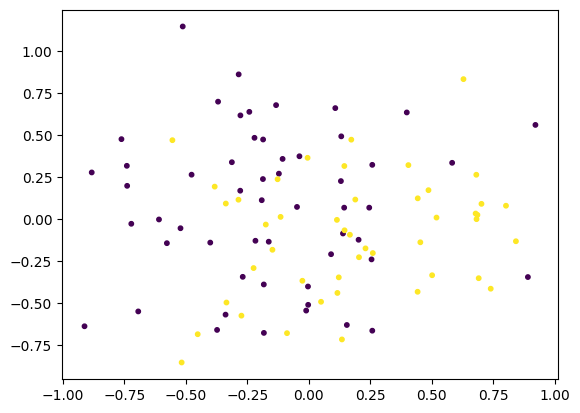

In [57]:
import prince
import matplotlib.pyplot as plt

n_elems = 100
mca = prince.MCA(n_components=6)
fitted = mca.fit(df.iloc[0:n_elems, :])
transformed = mca.transform(df.iloc[0:n_elems, :])

colors = [1 if x=="True" else 0 for x in df["centro_de_salud_cercano"][0:n_elems]]
print(len(colors))

scatter = plt.scatter(
  transformed.iloc[:, 0],
  transformed.iloc[:, 1],
  c = colors,
  s = 10
)




# legend_elements = scatter.legend_elements()
# plt.legend(legend_elements[0], ["G1", "G2", "G3"])
# plt.xlabel(F"Dimension 1 (Inertia: {100*fitted.explained_inertia_[0]:0.3f})%")
# plt.ylabel(F"Dimension 2 (Inertia: {100*fitted.explained_inertia_[1]:0.3f})%")